Data loaded successfully.
Dataset Shape: (5500, 45)
Timeframe: 1975 - 2024

--- 1. Missing Values Count (Significant Columns) ---
No missing values in significant columns (checking _noNull versions).

--- 2. Descriptive Statistics (Numerical) ---


,Real-World MPG_noNull,Real-World CO2 (g/mi)_noNull,Weight(lbs)_noNull,Horsepower (HP)_noNull
count,5500.000000,5500.000000,5500.000000,5500.000000
mean,17.989161,326.555505,2988.433975,145.534697
std,13.902505,199.975262,1712.674922,99.689379
min,0.000000,0.000000,0.000000,0.000000
25%,14.298610,272.667720,2556.901000,76.528850
50%,19.975710,380.462140,3554.379000,155.685450
75%,23.825935,455.057800,4144.161250,209.258150
max,129.831470,988.023890,6668.898000,566.456600



--- 3. Frequency Counts (Categorical) ---

Top 5 counts for Regulatory Class:
Regulatory Class
Truck    2550
Car      2200
All       750
Name: count, dtype: int64

Top 5 counts for Vehicle Type:
Vehicle Type
All            750
All Car        750
All Truck      750
Truck SUV      750
Sedan/Wagon    750
Name: count, dtype: int64

Top 5 counts for Manufacturer:
Manufacturer
All           400
Ford          400
GM            400
Stellantis    400
Honda         400
Name: count, dtype: int64


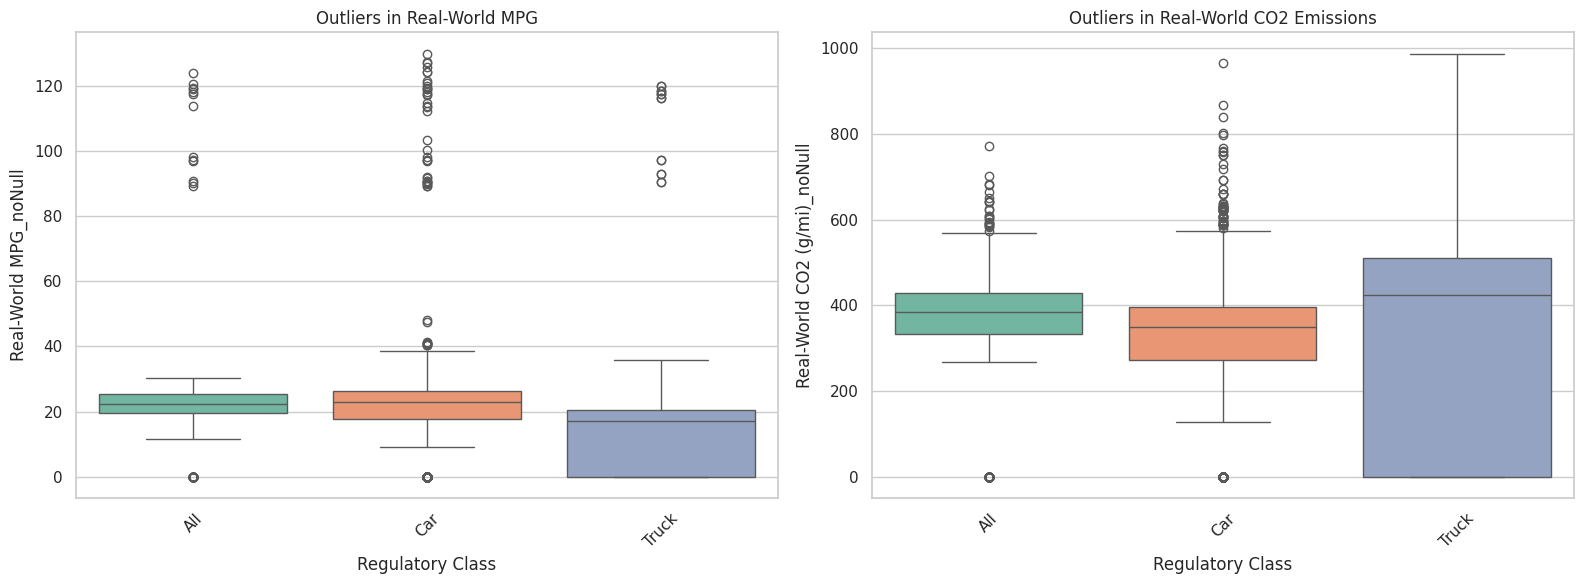

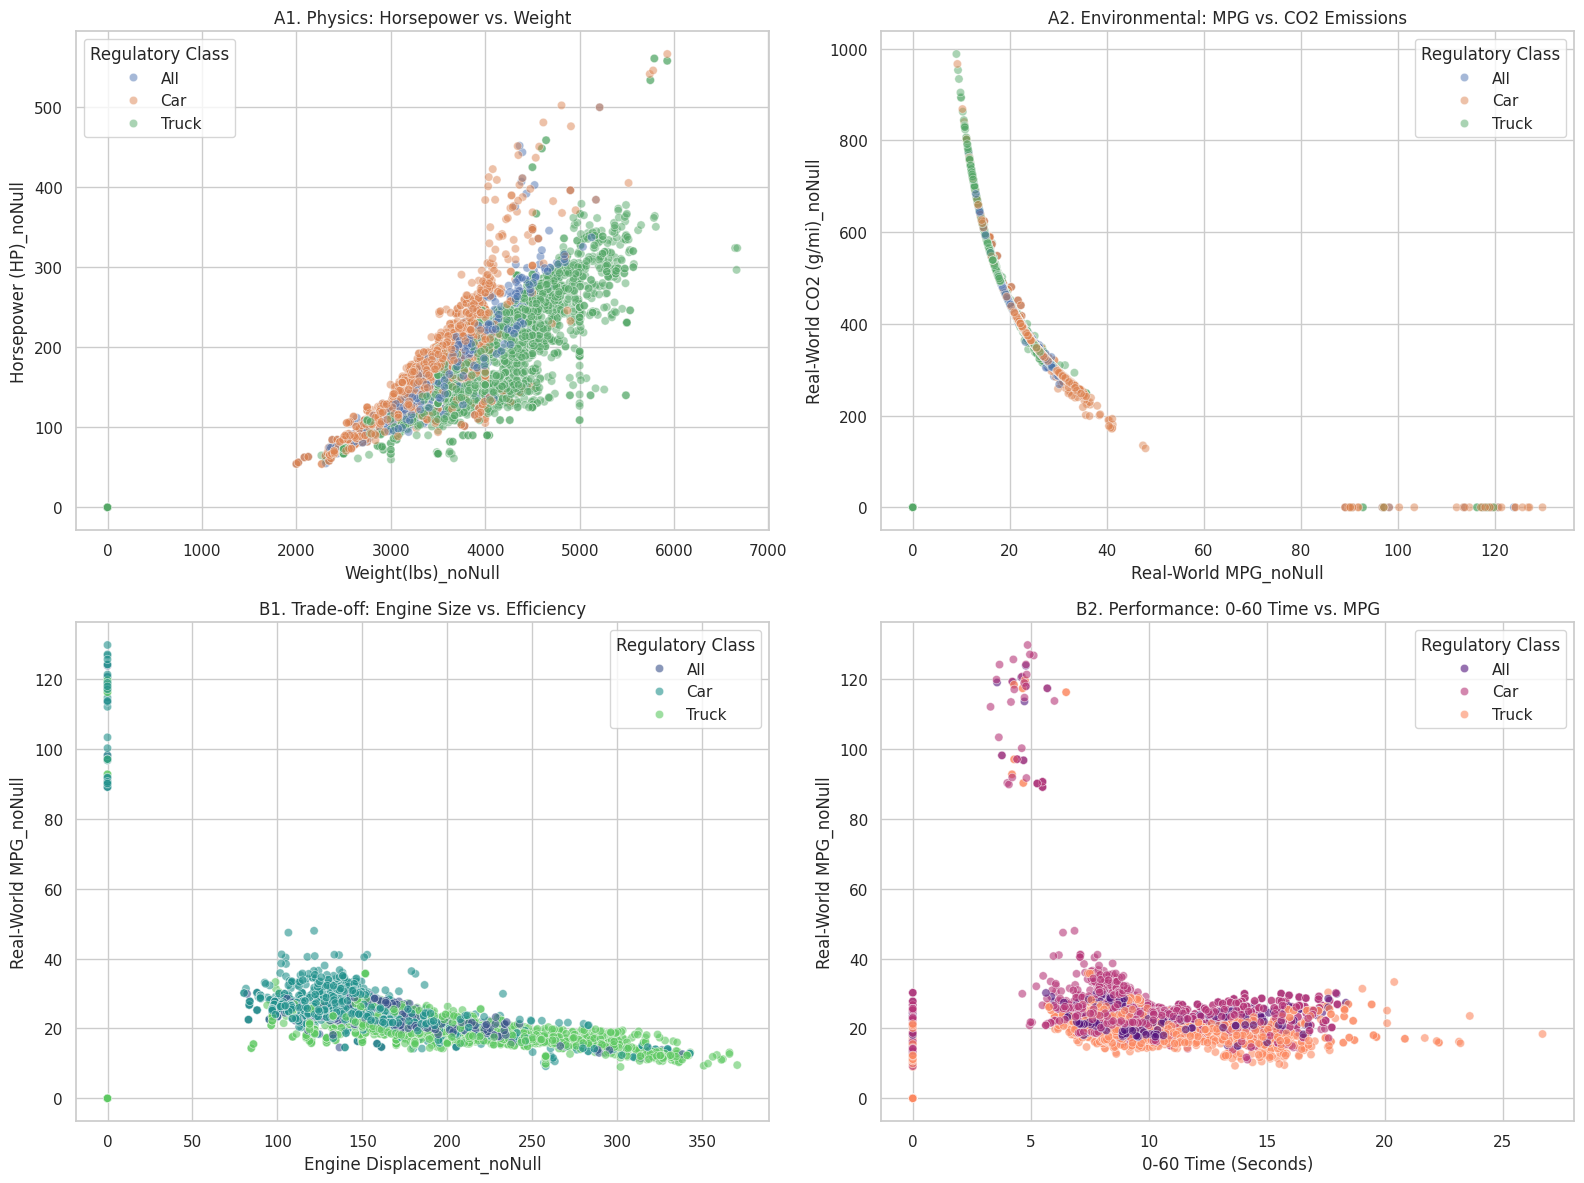

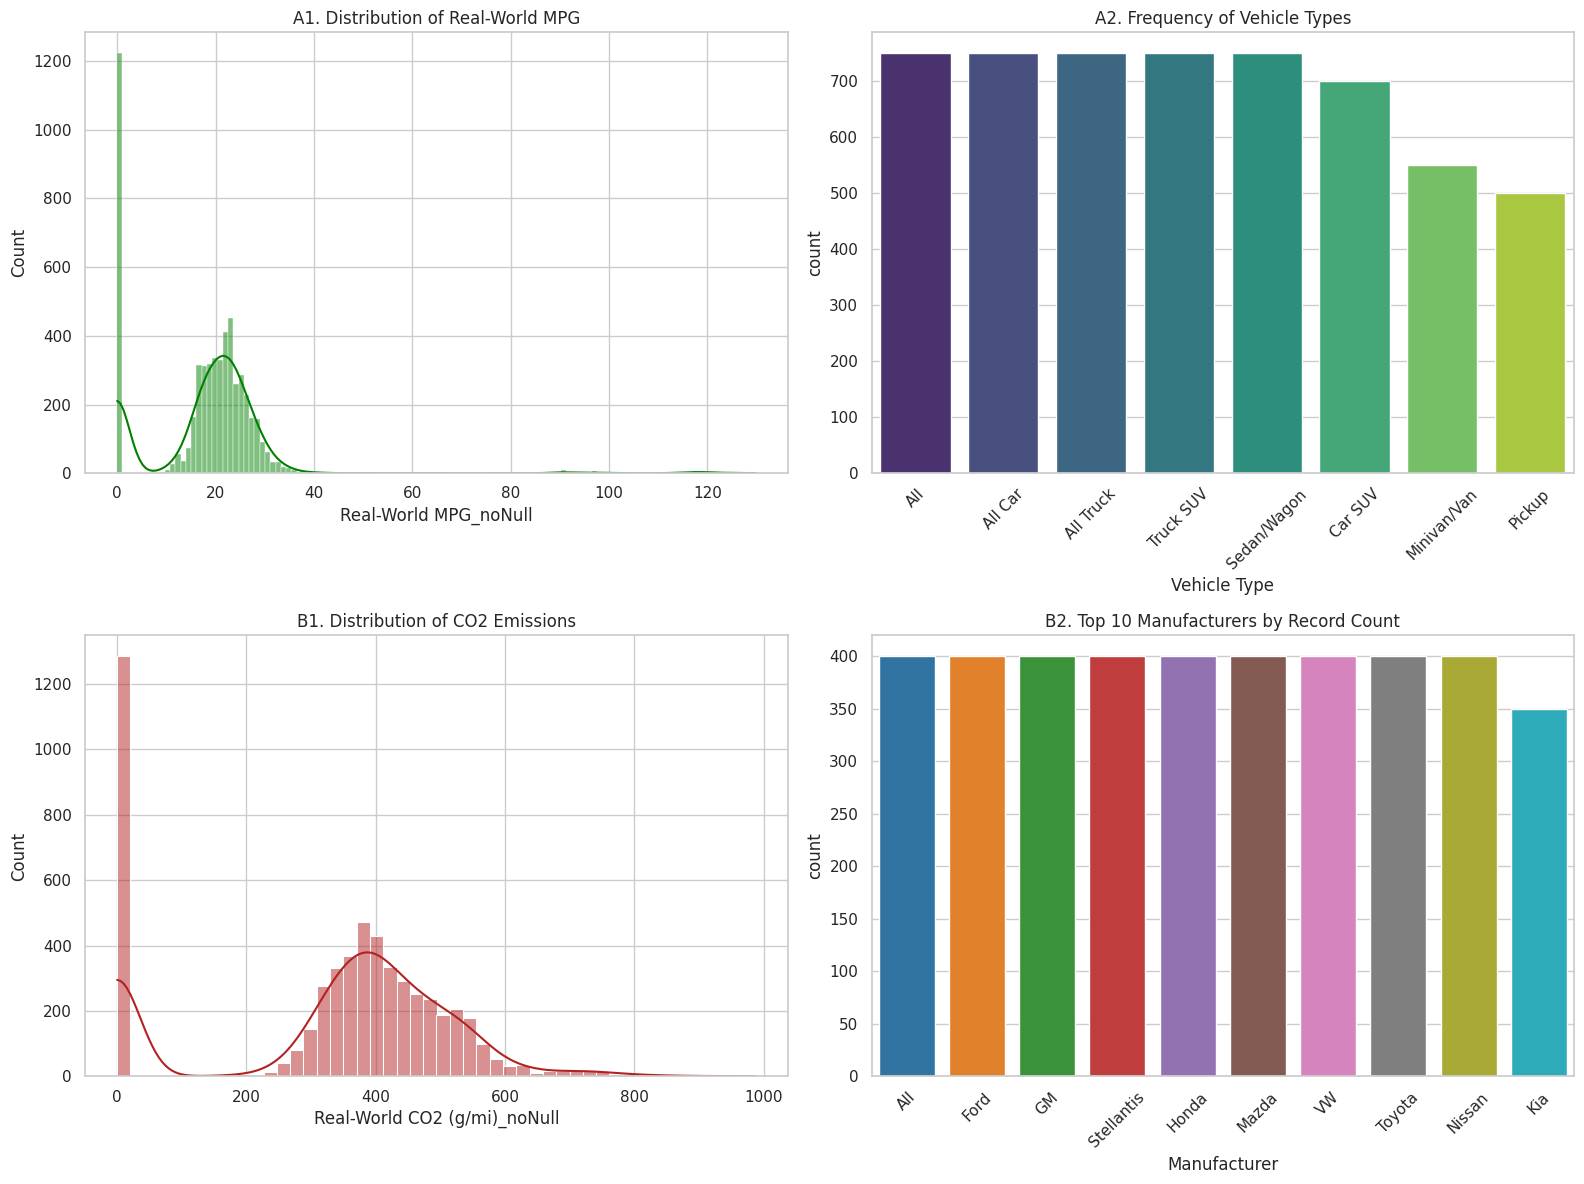

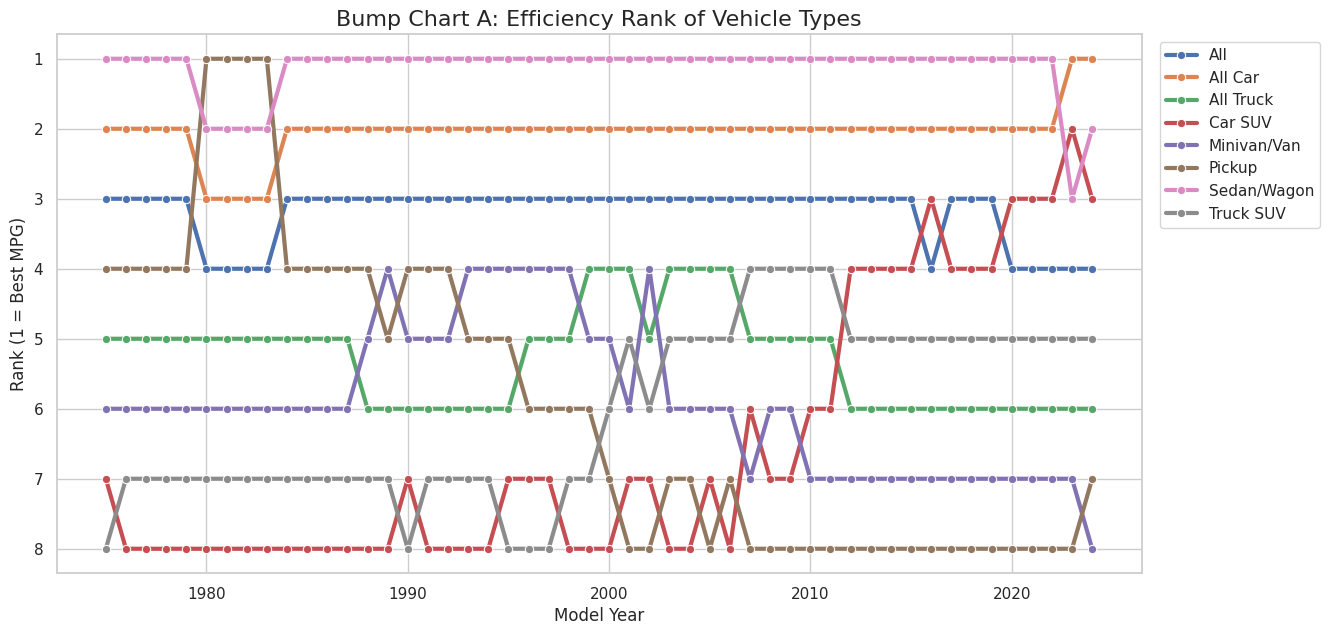

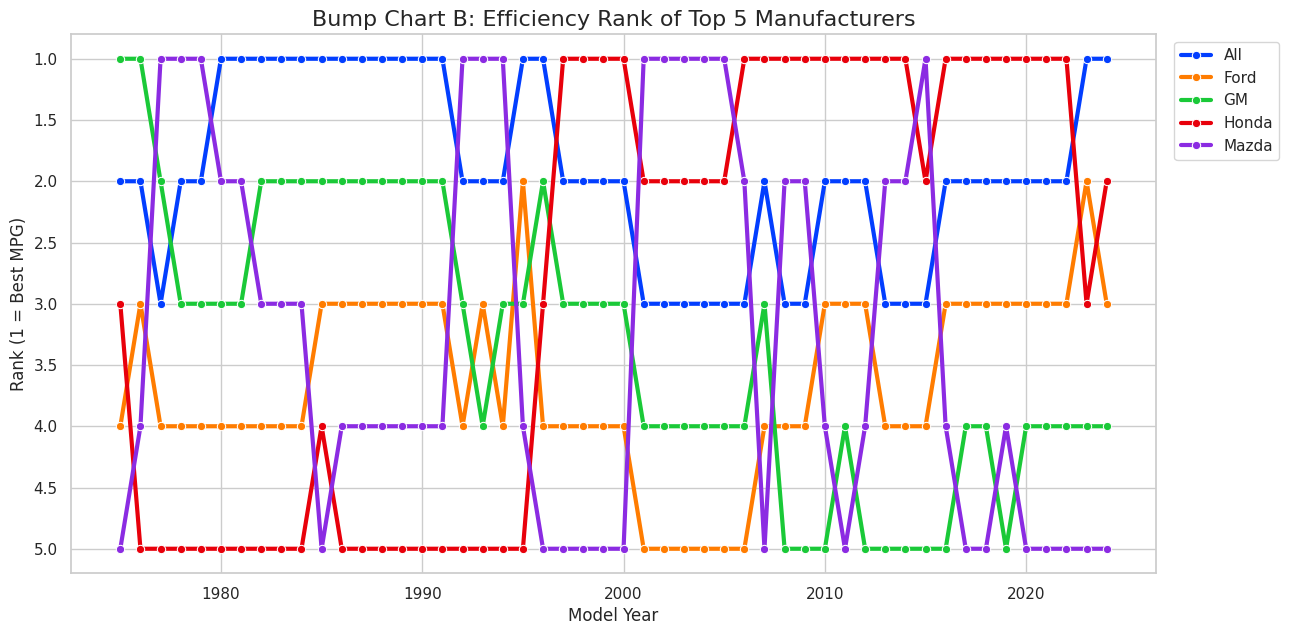

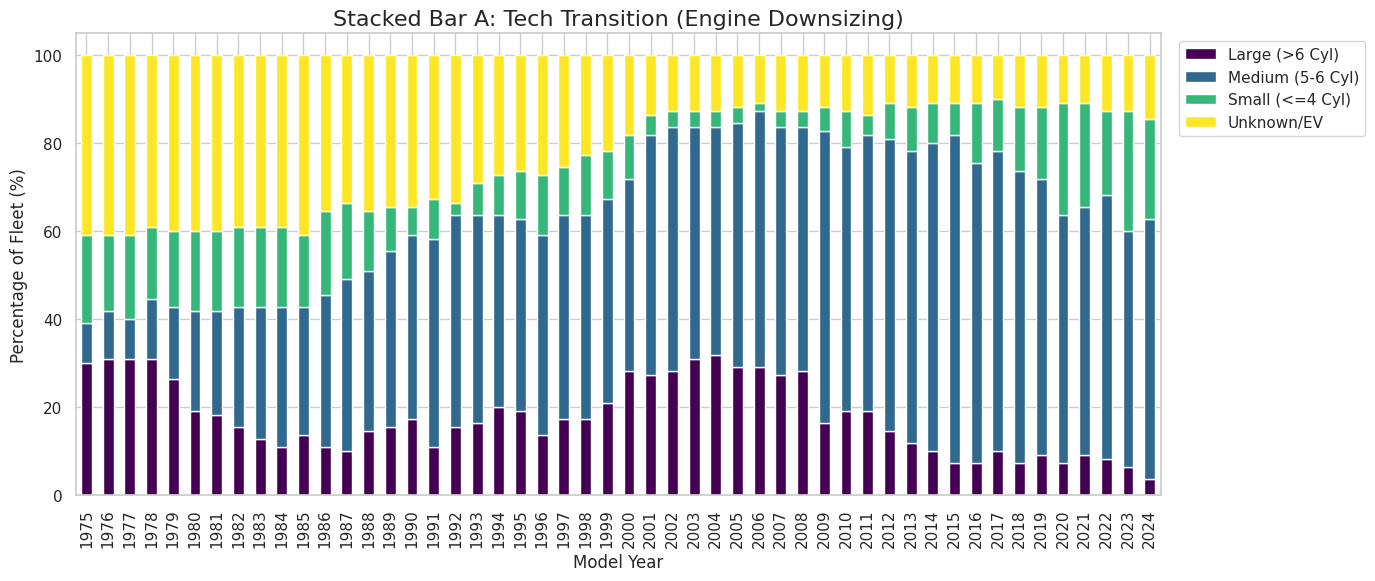

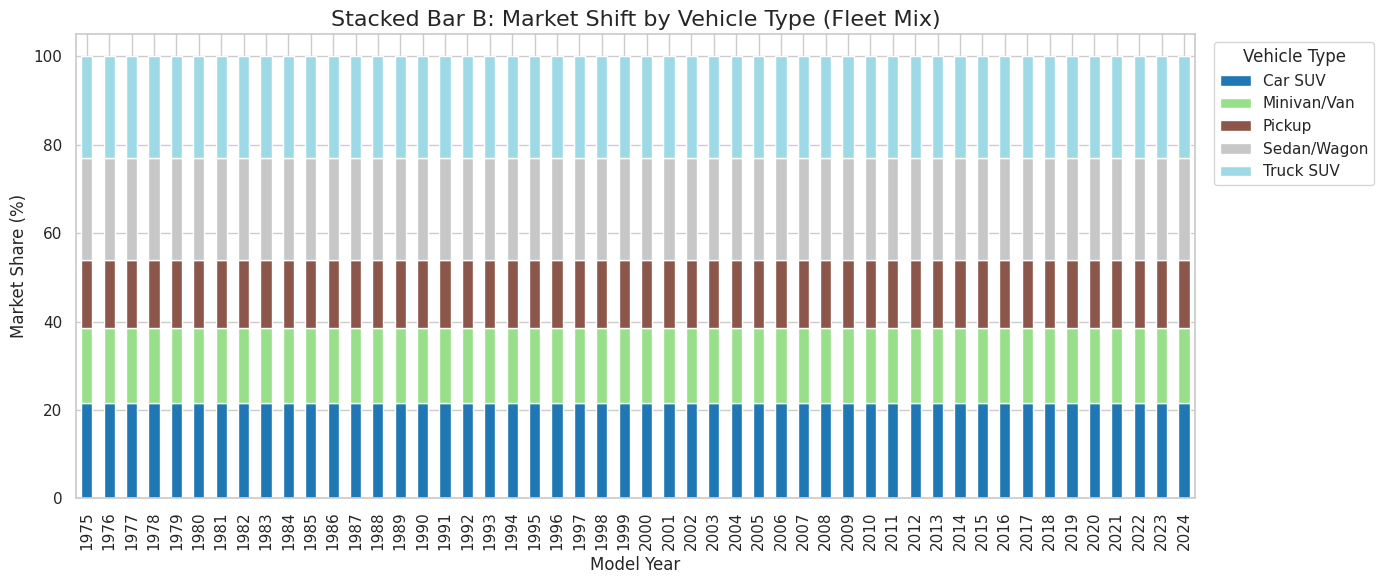

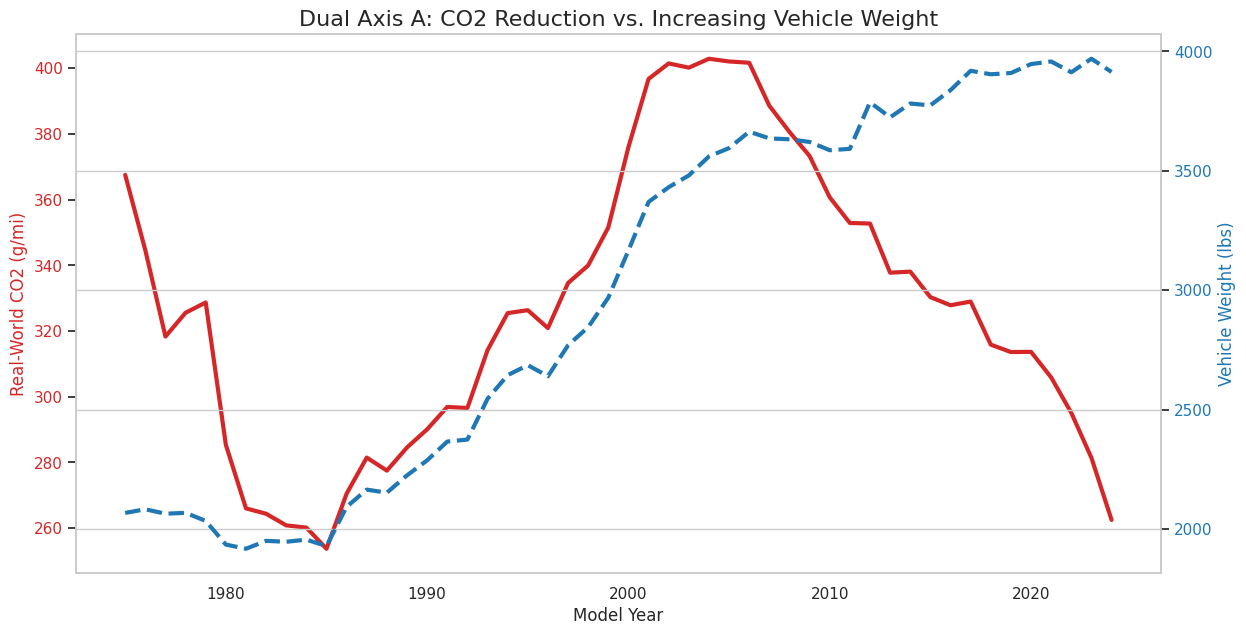

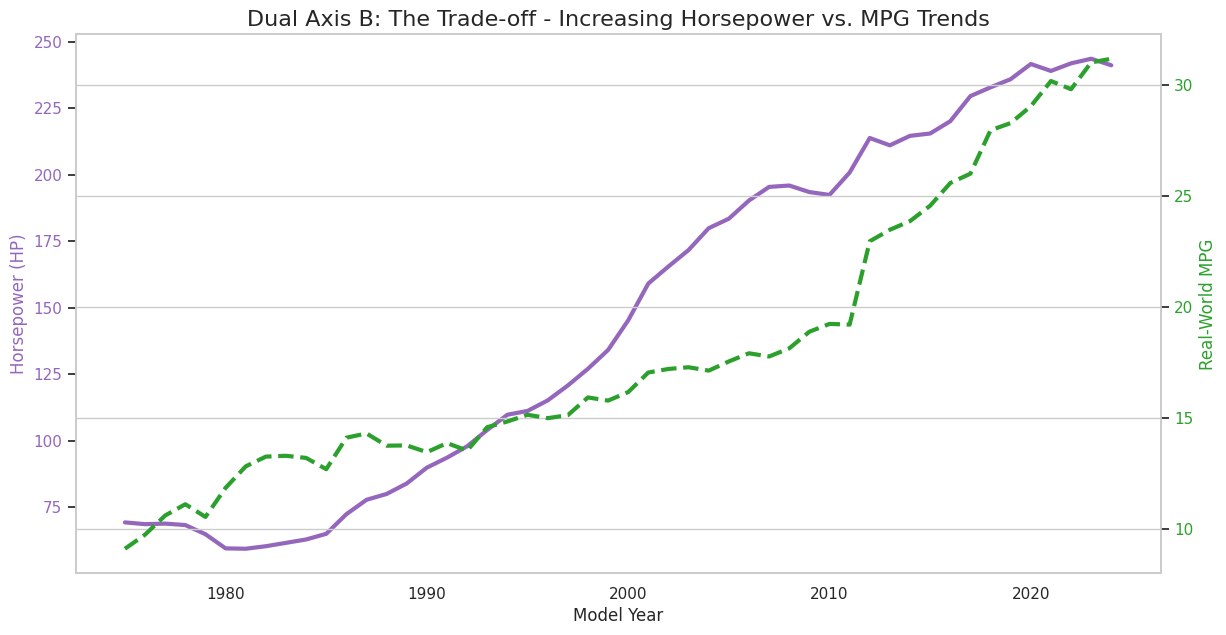

In [ ]:
# ==========================================
# CELL 1: Setup and Data Loading
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set visual style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# Load the file
file_name = 'TresSigmas_DataClean_HuliNa.csv'

try:
    df = pd.read_csv(file_name)
    print("Data loaded successfully.")

    # Pre-processing: Rename or cast Model Year if needed
    # Your file uses 'Model Year_Revised'
    if 'Model Year_Revised' in df.columns:
        df.rename(columns={'Model Year_Revised': 'Model Year'}, inplace=True)

    df = df.dropna(subset=['Model Year'])
    df['Model Year'] = df['Model Year'].astype(int)

    # Create a proxy for Production/Volume since the specific column is missing
    df['Vehicle_Count'] = 1

    print(f"Dataset Shape: {df.shape}")
    print(f"Timeframe: {df['Model Year'].min()} - {df['Model Year'].max()}")

except FileNotFoundError:
    print(f"ERROR: File '{file_name}' not found. Please upload it.")


# ==========================================
# CELL 2: EDA - Descriptive Statistics
# ==========================================
print("\n--- 1. Missing Values Count (Significant Columns) ---")
sig_cols = [
    'Model Year', 'Manufacturer', 'Regulatory Class', 'Vehicle Type',
    'Real-World MPG_noNull', 'Real-World CO2 (g/mi)_noNull',
    'Weight(lbs)_noNull', 'Horsepower (HP)_noNull',
    'Cylinders in Gasoline ICE Vehicles_noNull'
]
existing_sig_cols = [c for c in sig_cols if c in df.columns]
null_counts = df[existing_sig_cols].isnull().sum()
if null_counts.sum() > 0:
    print(null_counts[null_counts > 0])
else:
    print("No missing values in significant columns (checking _noNull versions).")

print("\n--- 2. Descriptive Statistics (Numerical) ---")
num_cols = ['Real-World MPG_noNull', 'Real-World CO2 (g/mi)_noNull',
            'Weight(lbs)_noNull', 'Horsepower (HP)_noNull']
display(df[num_cols].describe())

print("\n--- 3. Frequency Counts (Categorical) ---")
cat_cols = ['Regulatory Class', 'Vehicle Type', 'Manufacturer']
for col in cat_cols:
    if col in df.columns:
        print(f"\nTop 5 counts for {col}:")
        print(df[col].value_counts().head(5))


# ==========================================
# CELL 3: EDA - Outliers Visualization
# ==========================================
# Visualizing the extremes in our key environmental metrics
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot 1: Real-World MPG by Regulatory Class
sns.boxplot(data=df, x='Regulatory Class', y='Real-World MPG_noNull', ax=axes[0], palette='Set2')
axes[0].set_title('Outliers in Real-World MPG')
axes[0].tick_params(axis='x', rotation=45)

# Boxplot 2: Real-World CO2 by Regulatory Class
sns.boxplot(data=df, x='Regulatory Class', y='Real-World CO2 (g/mi)_noNull', ax=axes[1], palette='Set2')
axes[1].set_title('Outliers in Real-World CO2 Emissions')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# ==========================================
# CELL 4: EDA - Correlation Analysis
# ==========================================
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Weight vs HP (Physics)
sns.scatterplot(data=df, x='Weight(lbs)_noNull', y='Horsepower (HP)_noNull',
                hue='Regulatory Class', alpha=0.5, ax=axes[0,0])
axes[0,0].set_title('A1. Physics: Horsepower vs. Weight')

# 2. MPG vs CO2 (Environmental)
sns.scatterplot(data=df, x='Real-World MPG_noNull', y='Real-World CO2 (g/mi)_noNull',
                hue='Regulatory Class', alpha=0.5, ax=axes[0,1])
axes[0,1].set_title('A2. Environmental: MPG vs. CO2 Emissions')

# 3. Engine Displacement vs MPG (if available, else Weight vs MPG)
if 'Engine Displacement_noNull' in df.columns:
    sns.scatterplot(data=df, x='Engine Displacement_noNull', y='Real-World MPG_noNull',
                    hue='Regulatory Class', palette='viridis', alpha=0.6, ax=axes[1,0])
    axes[1,0].set_title('B1. Trade-off: Engine Size vs. Efficiency')
else:
    sns.scatterplot(data=df, x='Weight(lbs)_noNull', y='Real-World MPG_noNull',
                    hue='Regulatory Class', palette='viridis', alpha=0.6, ax=axes[1,0])
    axes[1,0].set_title('B1. Trade-off: Weight vs. Efficiency')

# 4. Acceleration vs MPG (Performance Cost)
acc_col = 'Acceleration (0-60 time in seconds)_noNull'
if acc_col in df.columns:
    sns.scatterplot(data=df, x=acc_col, y='Real-World MPG_noNull',
                    hue='Regulatory Class', palette='magma', alpha=0.6, ax=axes[1,1])
    axes[1,1].set_title('B2. Performance: 0-60 Time vs. MPG')
    axes[1,1].set_xlabel('0-60 Time (Seconds)')

plt.tight_layout()
plt.show()


# ==========================================
# CELL 5: EDA - Distribution Analysis
# ==========================================
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. MPG Histogram
sns.histplot(df['Real-World MPG_noNull'], kde=True, ax=axes[0,0], color='green')
axes[0,0].set_title('A1. Distribution of Real-World MPG')

# 2. Vehicle Type Frequency
sns.countplot(data=df, x='Vehicle Type', ax=axes[0,1], palette='viridis',
              order=df['Vehicle Type'].value_counts().index)
axes[0,1].set_title('A2. Frequency of Vehicle Types')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. CO2 Histogram
sns.histplot(df['Real-World CO2 (g/mi)_noNull'], kde=True, ax=axes[1,0], color='firebrick')
axes[1,0].set_title('B1. Distribution of CO2 Emissions')

# 4. Top 10 Manufacturers Count
top_10_mfr = df['Manufacturer'].value_counts().head(10).index
sns.countplot(data=df[df['Manufacturer'].isin(top_10_mfr)], x='Manufacturer',
              ax=axes[1,1], palette='tab10', order=top_10_mfr)
axes[1,1].set_title('B2. Top 10 Manufacturers by Record Count')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# ==========================================
# CELL 6: Viz Type 1 - Bump Charts (Ranking)
# ==========================================
# Example A: Rank of Vehicle Types (General)
df_bump_type = df.groupby(['Model Year', 'Vehicle Type'])['Real-World MPG_noNull'].mean().reset_index()
df_bump_type['Rank'] = df_bump_type.groupby('Model Year')['Real-World MPG_noNull'].rank(ascending=False)

plt.figure(figsize=(14, 7))
sns.lineplot(data=df_bump_type, x='Model Year', y='Rank', hue='Vehicle Type', marker='o', linewidth=3)
plt.gca().invert_yaxis()
plt.title('Bump Chart A: Efficiency Rank of Vehicle Types', fontsize=16)
plt.ylabel('Rank (1 = Best MPG)')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

# Example B: Rank of Top 5 Manufacturers
# We use 'Vehicle_Count' as a proxy for size to pick the biggest manufacturers
top_mfrs = df.groupby('Manufacturer')['Vehicle_Count'].sum().nlargest(5).index
df_top_mfr = df[df['Manufacturer'].isin(top_mfrs)]
df_bump_mfr = df_top_mfr.groupby(['Model Year', 'Manufacturer'])['Real-World MPG_noNull'].mean().reset_index()
df_bump_mfr['Rank'] = df_bump_mfr.groupby('Model Year')['Real-World MPG_noNull'].rank(ascending=False)

plt.figure(figsize=(14, 7))
sns.lineplot(data=df_bump_mfr, x='Model Year', y='Rank', hue='Manufacturer', marker='o', linewidth=3, palette='bright')
plt.gca().invert_yaxis()
plt.title('Bump Chart B: Efficiency Rank of Top 5 Manufacturers', fontsize=16)
plt.ylabel('Rank (1 = Best MPG)')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()


# ==========================================
# CELL 7: Viz Type 2 - Treemaps (Composition)
# ==========================================
# Note: Using Plotly for interactive Treemaps
latest_year = df['Model Year'].max()
df_tree = df[df['Model Year'] == latest_year].copy()

if not df_tree.empty:
    # Summarize data for Treemap (Aggregation)
    # We aggregate by Manufacturer/Class and count rows
    df_tree_agg1 = df_tree.groupby(['Manufacturer', 'Regulatory Class']).agg(
        Count=('Vehicle_Count', 'sum'),
        Avg_CO2=('Real-World CO2 (g/mi)_noNull', 'mean')
    ).reset_index()

    # Example A: Manufacturer -> Regulatory Class
    fig1 = px.treemap(df_tree_agg1,
                      path=['Manufacturer', 'Regulatory Class'],
                      values='Count',
                      color='Avg_CO2',
                      color_continuous_scale='RdYlGn_r',
                      title=f'Treemap A: Fleet Size & CO2 by Manufacturer ({latest_year})')
    fig1.show()

    # Summarize for second treemap
    df_tree_agg2 = df_tree.groupby(['Regulatory Class', 'Vehicle Type']).agg(
        Count=('Vehicle_Count', 'sum'),
        Avg_MPG=('Real-World MPG_noNull', 'mean')
    ).reset_index()

    # Example B: Regulatory Class -> Vehicle Type
    fig2 = px.treemap(df_tree_agg2,
                      path=['Regulatory Class', 'Vehicle Type'],
                      values='Count',
                      color='Avg_MPG',
                      color_continuous_scale='RdYlGn',
                      title=f'Treemap B: Fleet Composition & Efficiency ({latest_year})')
    fig2.show()


# ==========================================
# CELL 8: Viz Type 3 - Stacked Bar Charts (Evolution)
# ==========================================
# Example A: Engine Cylinder Count (Technology)
# Using raw cylinder counts (fill NA with mode or exclude)
df['Cylinders_Clean'] = df['Cylinders in Gasoline ICE Vehicles_noNull'].fillna(0)

def bin_cylinders(c):
    if c <= 0: return 'Unknown/EV' # Handle potential EVs or missing
    if c <= 4: return 'Small (<=4 Cyl)'
    elif c <= 6: return 'Medium (5-6 Cyl)'
    else: return 'Large (>6 Cyl)'

df['Cylinder_Bin'] = df['Cylinders_Clean'].apply(bin_cylinders)

# Filter out unknown if desired, or keep to show EVs
df_tech = df.groupby(['Model Year', 'Cylinder_Bin']).size().unstack(fill_value=0)
df_tech_pct = df_tech.div(df_tech.sum(axis=1), axis=0) * 100

ax = df_tech_pct.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='viridis')
plt.title('Stacked Bar A: Tech Transition (Engine Downsizing)', fontsize=16)
plt.ylabel('Percentage of Fleet (%)')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

# Example B: Market Shift by Vehicle Type
df_prod = df[~df['Vehicle Type'].isin(['All', 'All Car', 'All Truck'])]
df_type_share = df_prod.groupby(['Model Year', 'Vehicle Type'])['Vehicle_Count'].sum().unstack(fill_value=0)
df_type_share_pct = df_type_share.div(df_type_share.sum(axis=1), axis=0) * 100

ax = df_type_share_pct.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20')
plt.title('Stacked Bar B: Market Shift by Vehicle Type (Fleet Mix)', fontsize=16)
plt.ylabel('Market Share (%)')
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()


# ==========================================
# CELL 9: Viz Type 4 - Dual Axis Charts (Trade-offs)
# ==========================================
numeric_cols_for_trend = ['Real-World CO2 (g/mi)_noNull', 'Weight(lbs)_noNull',
                          'Horsepower (HP)_noNull', 'Real-World MPG_noNull']
df_trend = df.groupby('Model Year')[numeric_cols_for_trend].mean().reset_index()

# Example A: CO2 vs Weight
fig, ax1 = plt.subplots(figsize=(14, 7))
color1 = 'tab:red'
ax1.set_xlabel('Model Year', fontsize=12)
ax1.set_ylabel('Real-World CO2 (g/mi)', color=color1, fontsize=12)
ax1.plot(df_trend['Model Year'], df_trend['Real-World CO2 (g/mi)_noNull'], color=color1, linewidth=3)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(False)

ax2 = ax1.twinx()
color2 = 'tab:blue'
ax2.set_ylabel('Vehicle Weight (lbs)', color=color2, fontsize=12)
ax2.plot(df_trend['Model Year'], df_trend['Weight(lbs)_noNull'], color=color2, linewidth=3, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color2)
plt.title('Dual Axis A: CO2 Reduction vs. Increasing Vehicle Weight', fontsize=16)
plt.show()

# Example B: Horsepower vs MPG
fig, ax1 = plt.subplots(figsize=(14, 7))
color1 = 'tab:purple'
ax1.set_xlabel('Model Year', fontsize=12)
ax1.set_ylabel('Horsepower (HP)', color=color1, fontsize=12)
ax1.plot(df_trend['Model Year'], df_trend['Horsepower (HP)_noNull'], color=color1, linewidth=3)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(False)

ax2 = ax1.twinx()
color2 = 'tab:green'
ax2.set_ylabel('Real-World MPG', color=color2, fontsize=12)
ax2.plot(df_trend['Model Year'], df_trend['Real-World MPG_noNull'], color=color2, linewidth=3, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color2)
plt.title('Dual Axis B: The Trade-off - Increasing Horsepower vs. MPG Trends', fontsize=16)
plt.show()

✅ Data loaded successfully.
Dataset Shape: (5500, 45)

PART C: EXPLORATORY DATA ANALYSIS (EDA)

[1] Descriptive Statistics (Using AveImp Data)
Why: AveImp gives the statistical center of the fleet, accounting for missing zeroes.


,mean,median,min,max,std,mode
Real-World MPG_noNull_AveImp,23.127720,23.127720,8.99472,129.83147,10.041139,23.127720
Real-World CO2 (g/mi)_noNull_AveImp,426.009316,426.009316,128.54611,988.02389,86.643003,426.009316
Weight(lbs)_noNull_AveImp,3842.072665,3842.072665,2000.00000,6668.89800,617.858086,3842.072665
Horsepower (HP)_noNull_AveImp,187.106319,187.106319,54.11950,566.45660,62.343873,187.106319



[2] Categorical Frequency Counts

--- Top 5 Regulatory Class ---
Regulatory Class
Truck    2550
Car      2200
All       750
Name: count, dtype: int64

--- Top 5 Vehicle Type ---
Vehicle Type
All            750
All Car        750
All Truck      750
Truck SUV      750
Sedan/Wagon    750
Name: count, dtype: int64


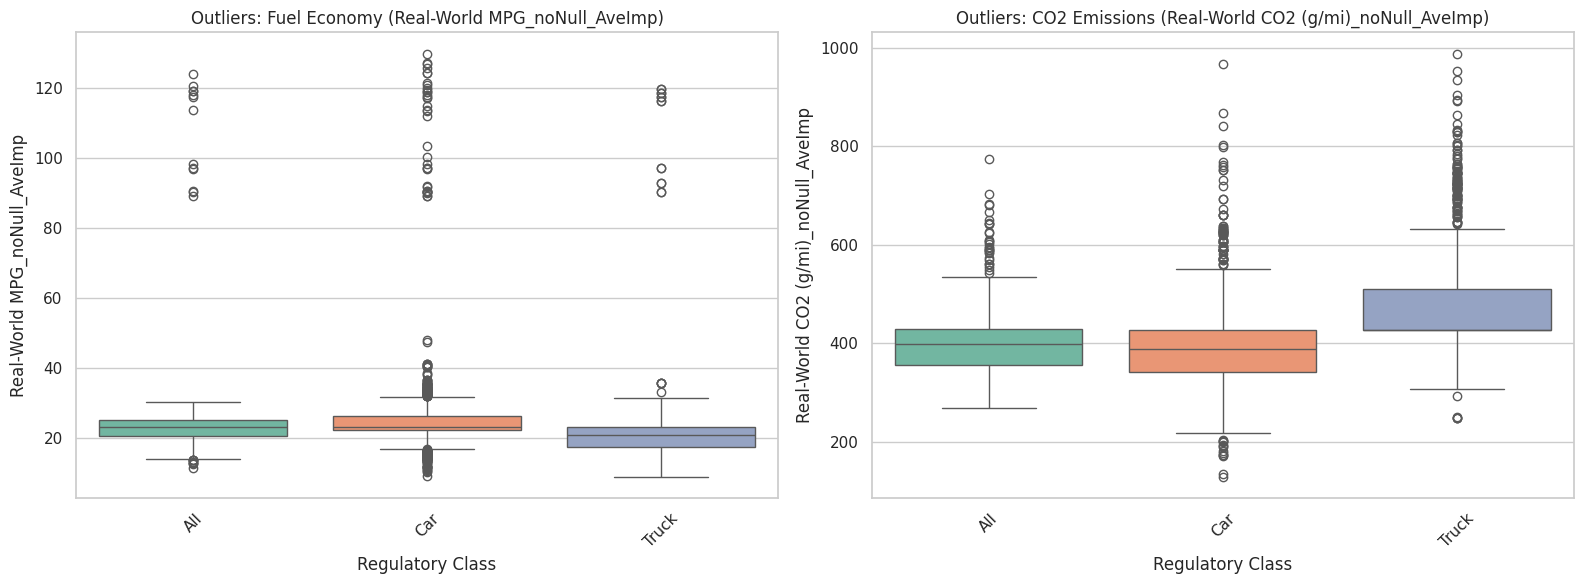

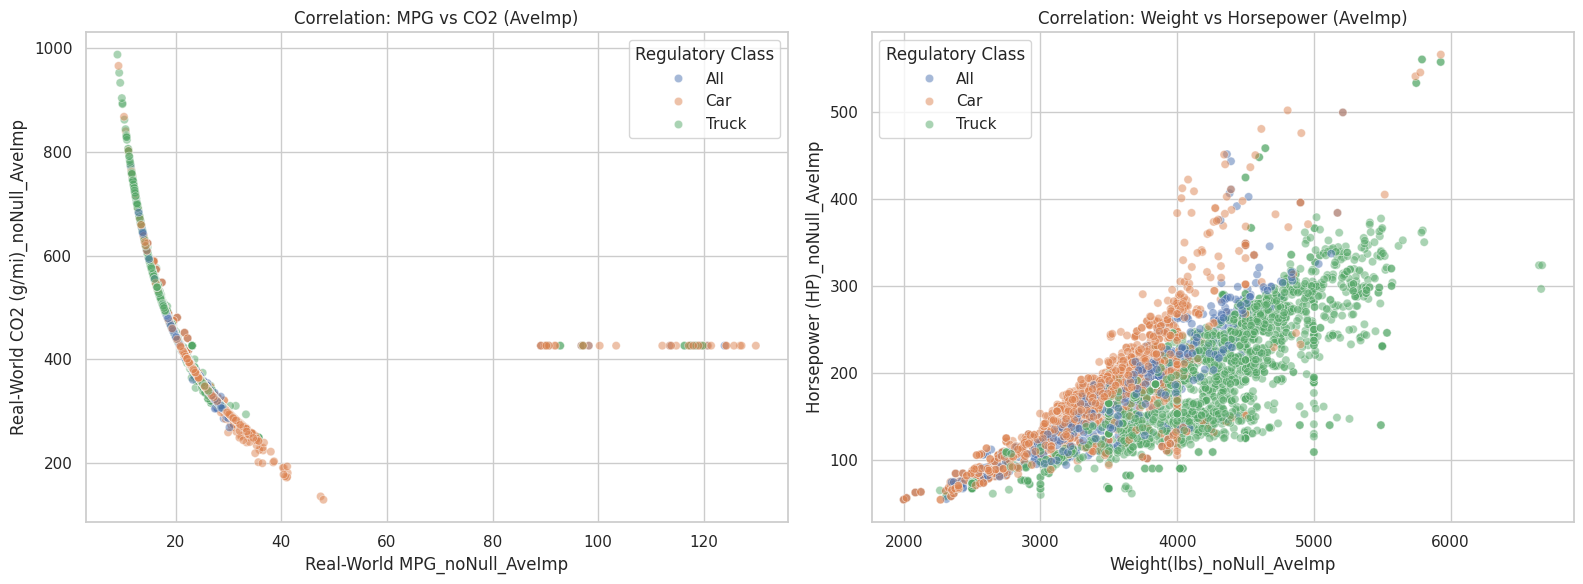

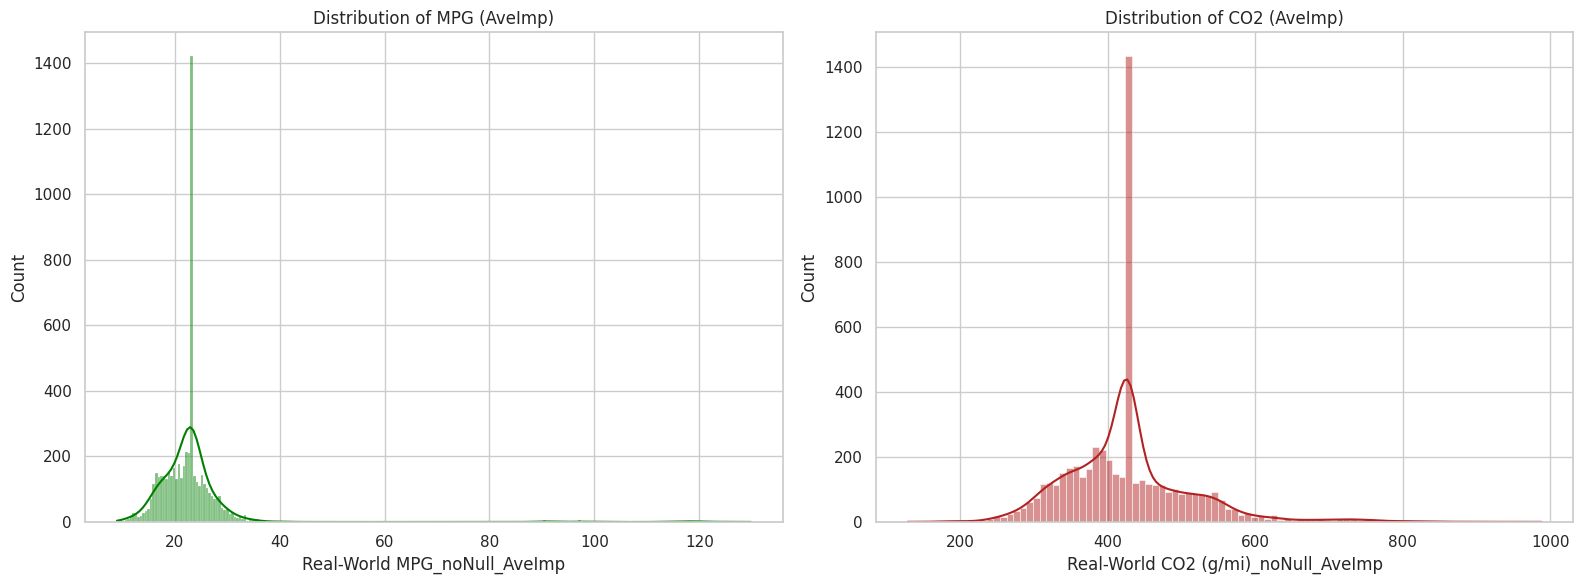


PART D: PLANNED VISUALIZATIONS


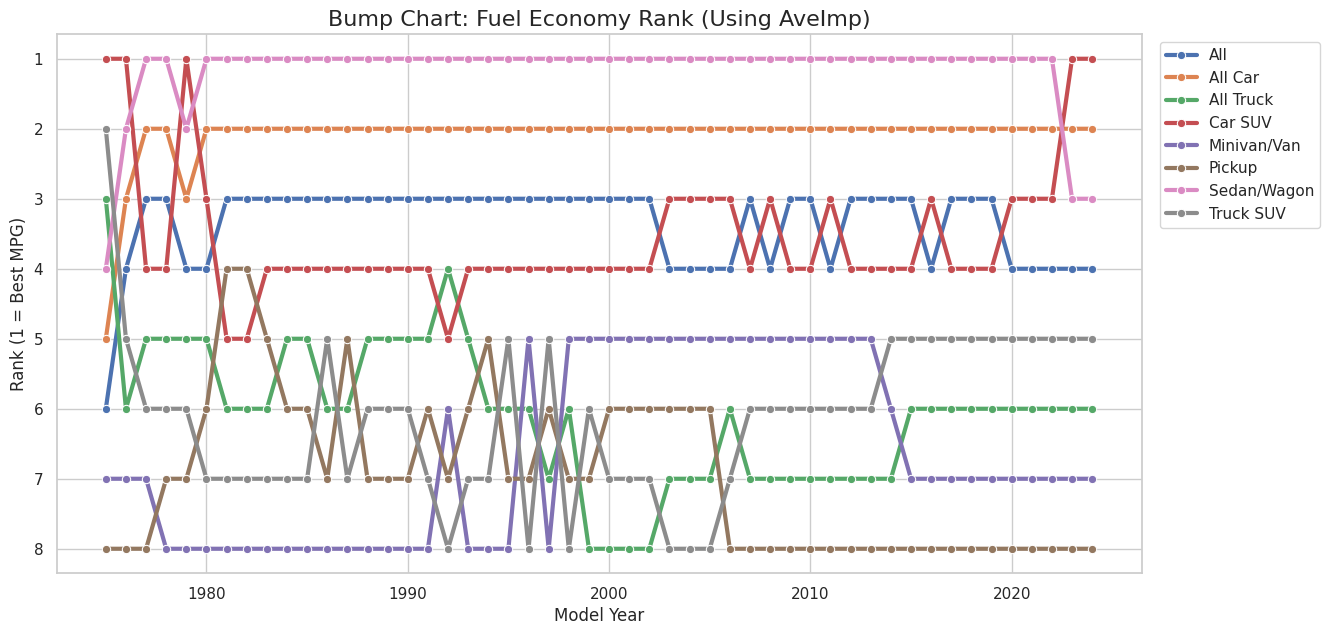

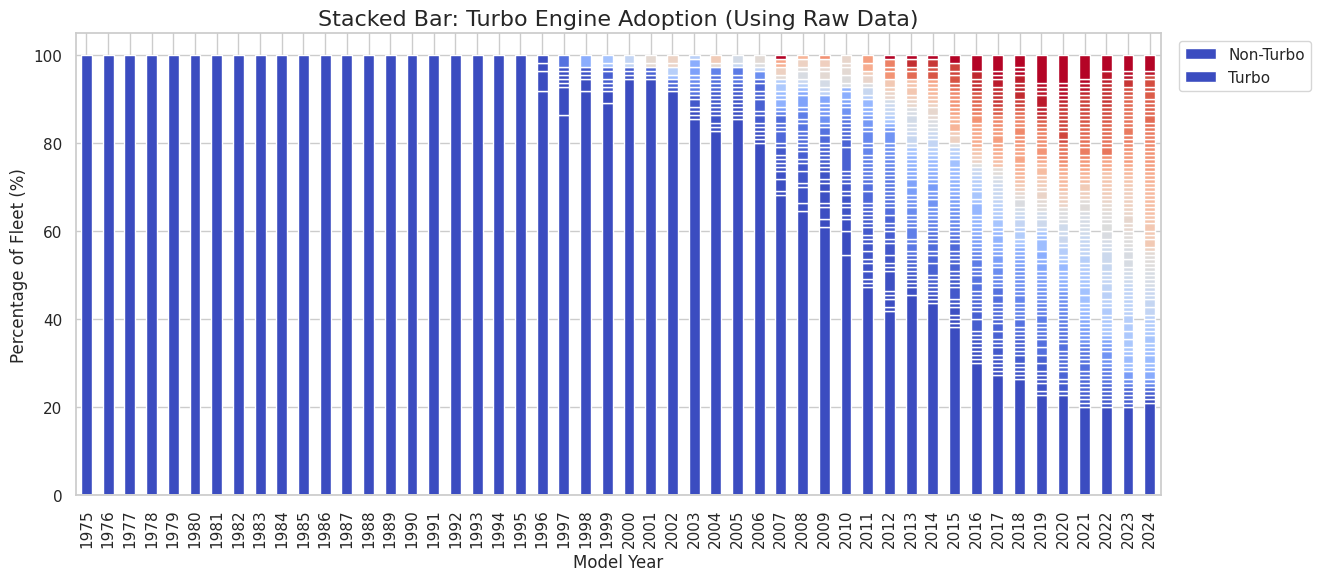

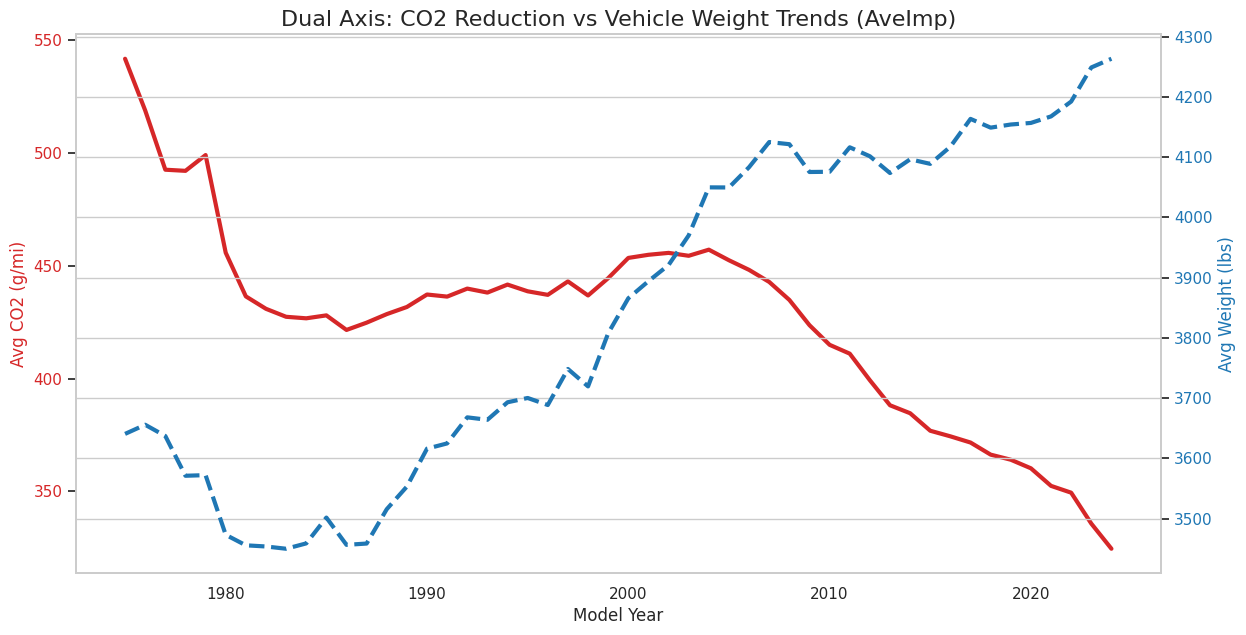


✅ All visualizations generated successfully.


In [ ]:
# ==========================================
# CELL 1: SETUP & DATA LOADING
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Visual Style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 12

# 1. Load Data
file_name = 'TresSigmas_DataClean_HuliNa.csv'

try:
    df = pd.read_csv(file_name)
    print("✅ Data loaded successfully.")

    # 2. Pre-processing
    # Ensure Model Year is an integer for plotting
    if 'Model Year_Revised' in df.columns:
        df.rename(columns={'Model Year_Revised': 'Model Year'}, inplace=True)
    df['Model Year'] = df['Model Year'].astype(int)

    # Create a 'Count' proxy since 'Production' column is missing
    df['Vehicle_Count'] = 1

    # 3. DEFINE COLUMN VARIABLES (The Strategy)
    # ---------------------------------------------------------
    # STRATEGY: Use 'AveImp' for Trends/Stats (Smoother data)
    # Use 'noNull' (Raw) for Categorical Counts (Exact groups)
    # ---------------------------------------------------------

    # Continuous Vars -> Use AveImp
    col_mpg   = 'Real-World MPG_noNull_AveImp'
    col_co2   = 'Real-World CO2 (g/mi)_noNull_AveImp'
    col_wgt   = 'Weight(lbs)_noNull_AveImp'
    col_hp    = 'Horsepower (HP)_noNull_AveImp'

    # Categorical/Binary Vars -> Use Raw (_noNull)
    col_turbo = 'Turbocharged Engine of Gasoline ICE Vehicles_noNull'
    col_cyl   = 'Cylinders in Gasoline ICE Vehicles_noNull'

    print(f"Dataset Shape: {df.shape}")

except FileNotFoundError:
    print(f"❌ ERROR: '{file_name}' not found. Please upload the file.")
    df = pd.DataFrame() # Prevent crash


if not df.empty:
    # ==========================================
    # CELL 2: EDA - DESCRIPTIVE STATISTICS
    # ==========================================
    print("\n" + "="*40)
    print("PART C: EXPLORATORY DATA ANALYSIS (EDA)")
    print("="*40)

    print(f"\n[1] Descriptive Statistics (Using AveImp Data)")
    print("Why: AveImp gives the statistical center of the fleet, accounting for missing zeroes.")

    # Numerical Stats
    num_stats = df[[col_mpg, col_co2, col_wgt, col_hp]].describe().T[['mean', '50%', 'min', 'max', 'std']]
    num_stats.rename(columns={'50%': 'median'}, inplace=True)
    # Calculate Mode
    num_stats['mode'] = df[[col_mpg, col_co2, col_wgt, col_hp]].mode().iloc[0].values
    display(num_stats)

    # Categorical Frequency
    print("\n[2] Categorical Frequency Counts")
    for cat in ['Regulatory Class', 'Vehicle Type']:
        print(f"\n--- Top 5 {cat} ---")
        print(df[cat].value_counts().head(5))


    # ==========================================
    # CELL 3: EDA - OUTLIERS & CORRELATION
    # ==========================================
    # 1. Boxplots (Outliers) - Using AveImp
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    sns.boxplot(data=df, x='Regulatory Class', y=col_mpg, ax=axes[0], palette='Set2')
    axes[0].set_title(f'Outliers: Fuel Economy ({col_mpg})')
    axes[0].tick_params(axis='x', rotation=45)

    sns.boxplot(data=df, x='Regulatory Class', y=col_co2, ax=axes[1], palette='Set2')
    axes[1].set_title(f'Outliers: CO2 Emissions ({col_co2})')
    axes[1].tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()

    # 2. Correlation - Using AveImp
    # Why: We want to see the relationship between physical properties corrected for missing data.
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # MPG vs CO2
    sns.scatterplot(data=df, x=col_mpg, y=col_co2, hue='Regulatory Class', alpha=0.5, ax=axes[0])
    axes[0].set_title('Correlation: MPG vs CO2 (AveImp)')

    # Weight vs HP
    sns.scatterplot(data=df, x=col_wgt, y=col_hp, hue='Regulatory Class', alpha=0.5, ax=axes[1])
    axes[1].set_title('Correlation: Weight vs Horsepower (AveImp)')
    plt.tight_layout()
    plt.show()

    # 3. Distribution - Using AveImp
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    sns.histplot(df[col_mpg], kde=True, ax=axes[0], color='green')
    axes[0].set_title('Distribution of MPG (AveImp)')

    sns.histplot(df[col_co2], kde=True, ax=axes[1], color='firebrick')
    axes[1].set_title('Distribution of CO2 (AveImp)')
    plt.tight_layout()
    plt.show()


    # ==========================================
    # CELL 4: PLANNED VIZ - BUMP CHART
    # ==========================================
    print("\n" + "="*40)
    print("PART D: PLANNED VISUALIZATIONS")
    print("="*40)

    # Why AveImp? We want to rank the "true" efficiency of the fleet.
    # If we used raw data with 0s, some types might look artificially inefficient.

    # Bump Chart 1: Vehicle Type Efficiency Rank
    df_bump = df.groupby(['Model Year', 'Vehicle Type'])[col_mpg].mean().reset_index()
    df_bump['Rank'] = df_bump.groupby('Model Year')[col_mpg].rank(ascending=False)

    plt.figure(figsize=(14, 7))
    sns.lineplot(data=df_bump, x='Model Year', y='Rank', hue='Vehicle Type', marker='o', linewidth=3)
    plt.gca().invert_yaxis() # Rank 1 at top
    plt.title('Bump Chart: Fuel Economy Rank (Using AveImp)', fontsize=16)
    plt.ylabel('Rank (1 = Best MPG)')
    plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
    plt.show()


    # ==========================================
    # CELL 5: PLANNED VIZ - TREEMAP
    # ==========================================
    # Why Mixed?
    # - Grouping: Uses Raw Categorical Data (Manufacturer)
    # - Color: Uses AveImp (Avg CO2) to show intensity accurately

    latest_year = df['Model Year'].max()
    df_tree = df[df['Model Year'] == latest_year].copy()

    # Aggregate
    df_tree_agg = df_tree.groupby(['Manufacturer', 'Regulatory Class']).agg(
        Fleet_Size=('Vehicle_Count', 'sum'),
        Avg_CO2_Intensity=(col_co2, 'mean') # Using AveImp for Color
    ).reset_index()

    # Filter for significant manufacturers (Top 20 by size)
    top_mfrs = df_tree_agg.groupby('Manufacturer')['Fleet_Size'].sum().nlargest(20).index
    df_tree_agg = df_tree_agg[df_tree_agg['Manufacturer'].isin(top_mfrs)]

    fig = px.treemap(df_tree_agg,
                     path=['Manufacturer', 'Regulatory Class'],
                     values='Fleet_Size',
                     color='Avg_CO2_Intensity',
                     color_continuous_scale='RdYlGn_r', # Red = High CO2, Green = Low
                     title=f'Treemap: Market Share & CO2 Intensity (AveImp) - {latest_year}')
    fig.show()


    # ==========================================
    # CELL 6: PLANNED VIZ - STACKED BAR
    # ==========================================
    # Why Raw (_noNull)?
    # - We are counting distinct technologies. 'AveImp' would turn 0s into averages,
    #   making it impossible to count "How many cars have 4 cylinders?".

    # Stacked Bar 1: Turbo Adoption
    df_turbo = df.groupby(['Model Year', col_turbo]).size().unstack(fill_value=0)
    # Normalize to Percentage
    df_turbo_pct = df_turbo.div(df_turbo.sum(axis=1), axis=0) * 100

    ax = df_turbo_pct.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='coolwarm')
    plt.title('Stacked Bar: Turbo Engine Adoption (Using Raw Data)', fontsize=16)
    plt.ylabel('Percentage of Fleet (%)')
    plt.legend(['Non-Turbo', 'Turbo'], bbox_to_anchor=(1.01, 1), loc='upper left')
    plt.show()


    # ==========================================
    # CELL 7: PLANNED VIZ - DUAL AXIS LINE
    # ==========================================
    # Why AveImp? We are tracking continuous trends (Weight vs CO2) over decades.
    # AveImp ensures the lines are smooth and representative.

    df_trend = df.groupby('Model Year')[[col_co2, col_wgt]].mean().reset_index()

    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Axis 1: CO2
    color1 = 'tab:red'
    ax1.set_xlabel('Model Year')
    ax1.set_ylabel('Avg CO2 (g/mi)', color=color1)
    ax1.plot(df_trend['Model Year'], df_trend[col_co2], color=color1, linewidth=3, label='CO2 (AveImp)')
    ax1.tick_params(axis='y', labelcolor=color1)
    ax1.grid(False) # Turn off grid for cleaner dual axis

    # Axis 2: Weight
    ax2 = ax1.twinx()
    color2 = 'tab:blue'
    ax2.set_ylabel('Avg Weight (lbs)', color=color2)
    ax2.plot(df_trend['Model Year'], df_trend[col_wgt], color=color2, linewidth=3, linestyle='--', label='Weight (AveImp)')
    ax2.tick_params(axis='y', labelcolor=color2)

    plt.title('Dual Axis: CO2 Reduction vs Vehicle Weight Trends (AveImp)', fontsize=16)
    plt.show()

    print("\n✅ All visualizations generated successfully.")

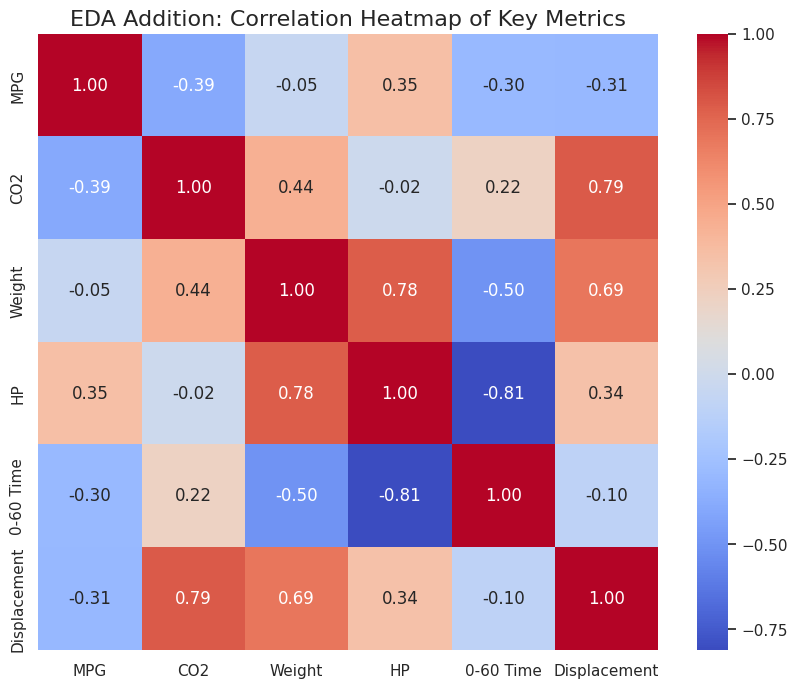

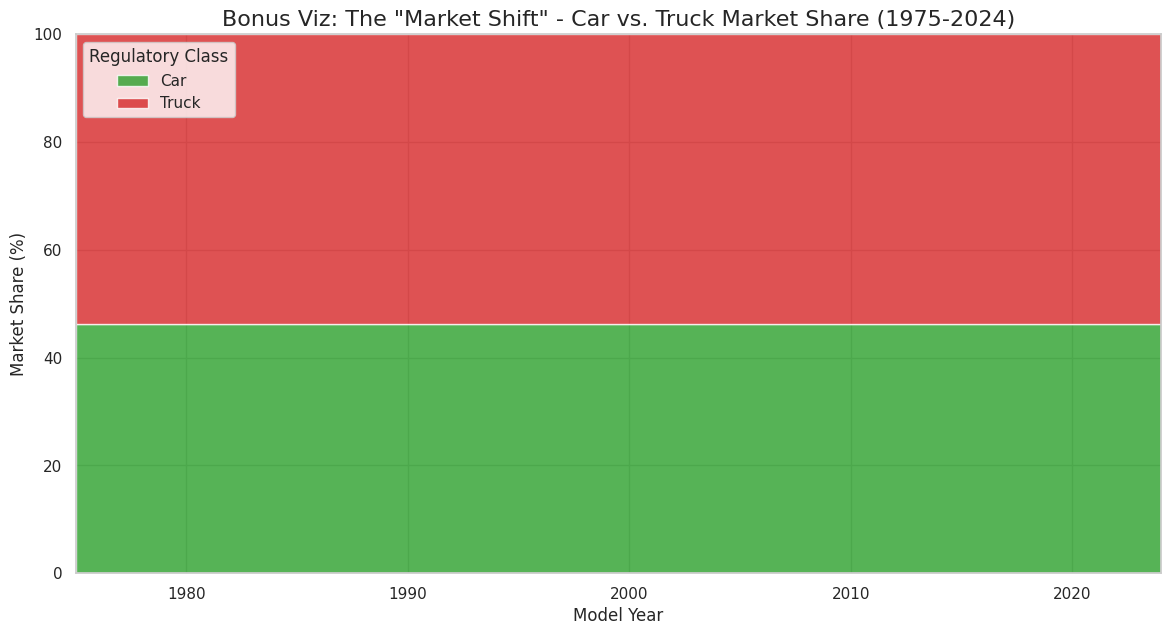

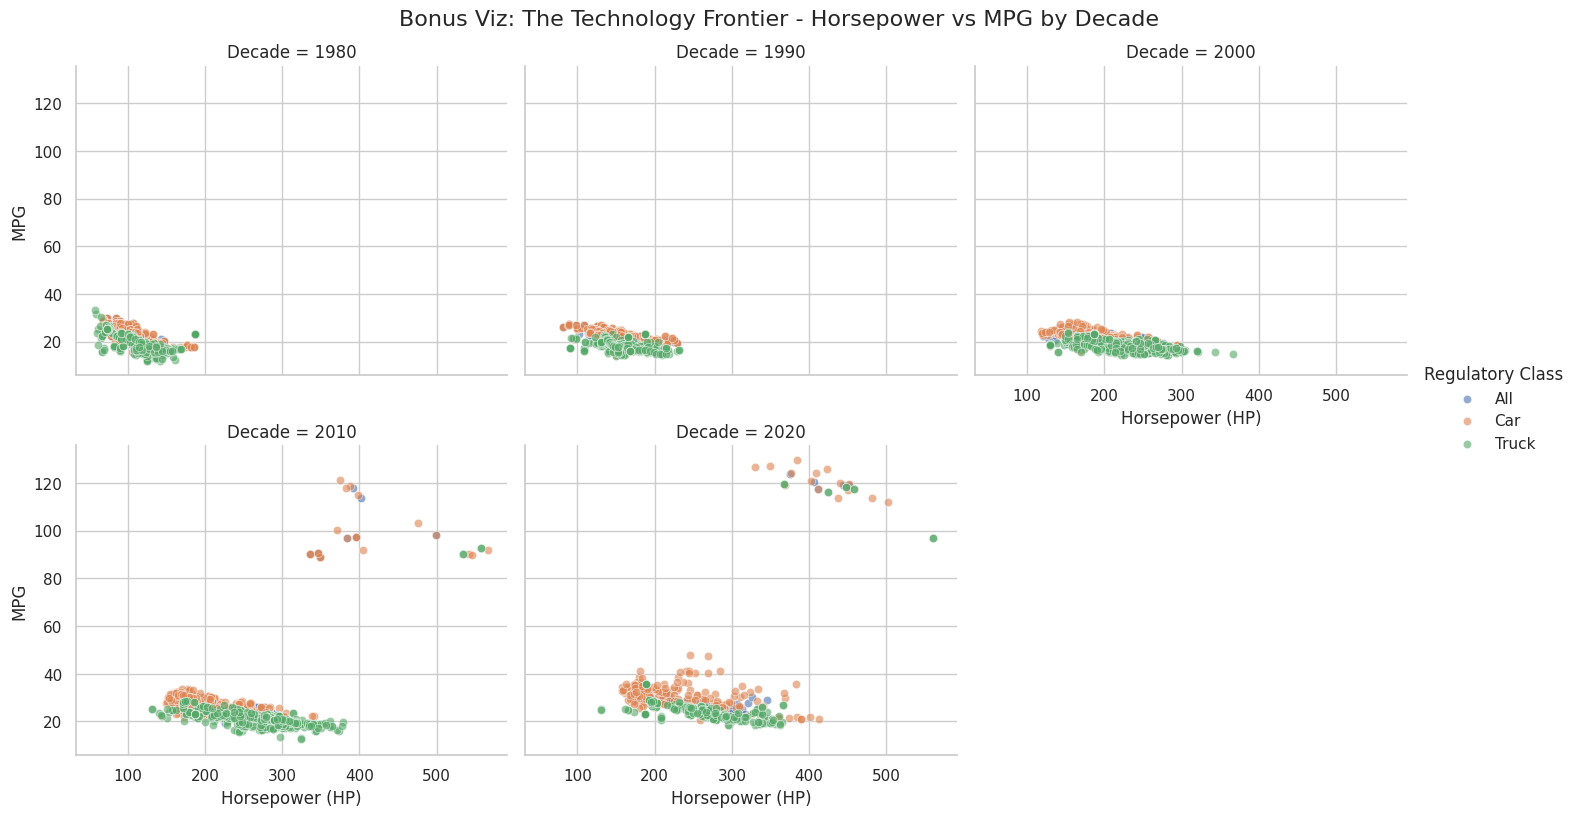

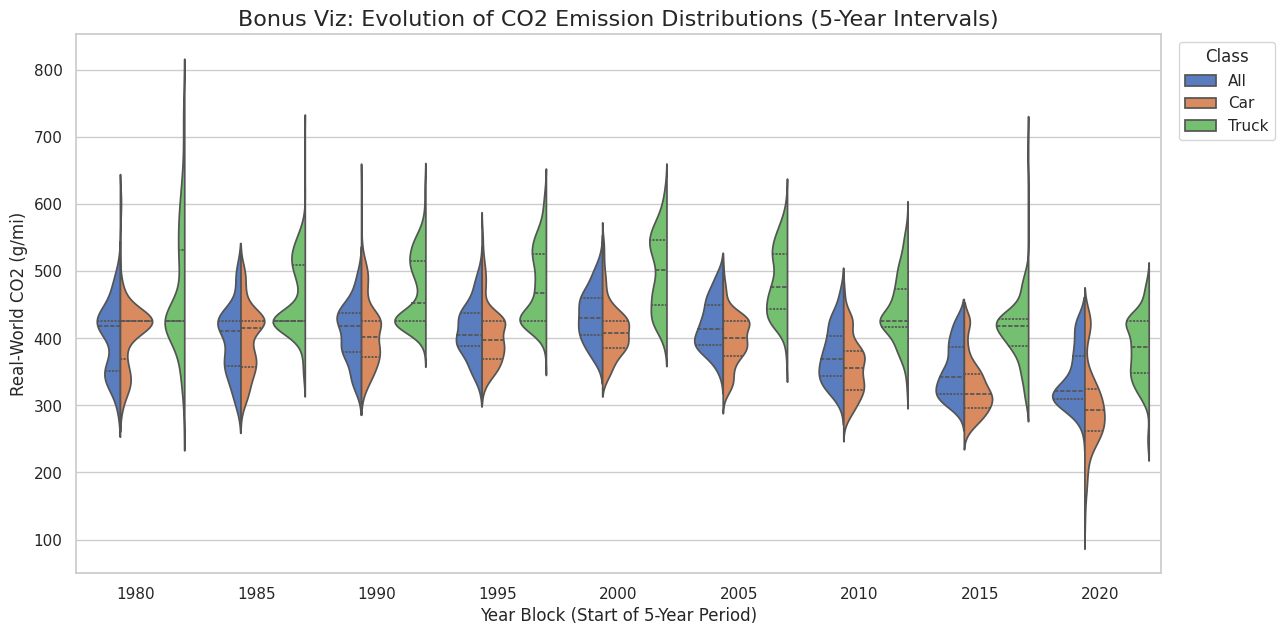

In [ ]:
# ==========================================
# CELL 10: ADVANCED / BONUS VISUALIZATIONS
# ==========================================
# GOAL: Deepen the analysis of SDG 7 (Efficiency) and SDG 13 (Emissions)
#       by looking at Market Shifts and Technology Frontiers.

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ensure data is ready (re-using 'df' from previous cells)
# Define the AveImp columns for smooth trends
col_mpg = 'Real-World MPG_noNull_AveImp'
col_co2 = 'Real-World CO2 (g/mi)_noNull_AveImp'
col_wgt = 'Weight(lbs)_noNull_AveImp'
col_hp = 'Horsepower (HP)_noNull_AveImp'

# -------------------------------------------------------------------------
# ADDITION 1: EDA - CORRELATION HEATMAP
# -------------------------------------------------------------------------
# Why: Provides a "Bird's Eye View" of all variable relationships at once.
# Helps identify if Weight or Horsepower is the bigger enemy of MPG.

plt.figure(figsize=(10, 8))
# Select key numerical columns
corr_cols = [col_mpg, col_co2, col_wgt, col_hp,
             'Acceleration (0-60 time in seconds)_noNull_AveImp',
             'Engine Displacement_noNull_AveImp']
# Rename for cleaner labels
corr_labels = ['MPG', 'CO2', 'Weight', 'HP', '0-60 Time', 'Displacement']

corr_matrix = df[corr_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=corr_labels, yticklabels=corr_labels)
plt.title('EDA Addition: Correlation Heatmap of Key Metrics', fontsize=16)
plt.show()


# -------------------------------------------------------------------------
# ADDITION 2: PLANNED VIZ - MARKET SHIFT (STACKED AREA)
# -------------------------------------------------------------------------
# Why: Aligns with SDG 13 (Climate Action).
# Shows the massive shift from "Cars" (Cleaner) to "Trucks/SUVs" (Dirtier).
# This explains WHY CO2 reduction might be slowing down despite better tech.

# Filter out 'All' category if present to avoid double counting
df_market = df[df['Regulatory Class'].isin(['Car', 'Truck'])].copy()
# Group by Year and Class, count vehicles (or use Production if available)
df_area = df_market.groupby(['Model Year', 'Regulatory Class']).size().unstack(fill_value=0)
# Normalize to 100% to show "Share"
df_area_pct = df_area.div(df_area.sum(axis=1), axis=0) * 100

plt.figure(figsize=(14, 7))
plt.stackplot(df_area_pct.index, df_area_pct['Car'], df_area_pct['Truck'],
              labels=['Car', 'Truck'], colors=['#2ca02c', '#d62728'], alpha=0.8)
plt.legend(loc='upper left', title='Regulatory Class')
plt.title('Bonus Viz: The "Market Shift" - Car vs. Truck Market Share (1975-2024)', fontsize=16)
plt.ylabel('Market Share (%)')
plt.xlabel('Model Year')
plt.margins(0, 0) # Tight fit
plt.show()


# -------------------------------------------------------------------------
# ADDITION 3: PLANNED VIZ - THE "TECH FRONTIER" (FACETED SCATTER)
# -------------------------------------------------------------------------
# Why: Aligns with SDG 7 (Technology).
# Shows how we get "More Power AND More MPG" over time.
# By splitting by Decade, we see the "Frontier" curve move outwards.

# Create a Decade column
df['Decade'] = (df['Model Year'] // 10) * 10
df_frontier = df[df['Decade'] >= 1980].copy() # Focus on 1980s onwards

g = sns.FacetGrid(df_frontier, col="Decade", col_wrap=3, height=4, aspect=1.2, hue='Regulatory Class')
g.map(sns.scatterplot, col_hp, col_mpg, alpha=0.6)
g.add_legend()
g.fig.suptitle('Bonus Viz: The Technology Frontier - Horsepower vs MPG by Decade', fontsize=16, y=1.02)
g.set_axis_labels("Horsepower (HP)", "MPG")
plt.show()


# -------------------------------------------------------------------------
# ADDITION 4: PLANNED VIZ - DISTRIBUTION SHIFTS (VIOLIN PLOTS)
# -------------------------------------------------------------------------
# Why: Shows if we are raising the "floor" (worst cars getting better)
# or raising the "ceiling" (best cars getting better).

plt.figure(figsize=(14, 7))
# We create bins of years to make the violin plot readable (e.g., every 5 years)
df['Year_Group'] = (df['Model Year'] // 5) * 5
# Filter to start from 1980 for cleaner view
df_violin = df[df['Year_Group'] >= 1980]

sns.violinplot(data=df_violin, x='Year_Group', y=col_co2, hue='Regulatory Class',
               split=True, inner='quartile', palette='muted')
plt.title('Bonus Viz: Evolution of CO2 Emission Distributions (5-Year Intervals)', fontsize=16)
plt.ylabel('Real-World CO2 (g/mi)')
plt.xlabel('Year Block (Start of 5-Year Period)')
plt.legend(title='Class', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()